# Cool dataset

Main dataset: [Emissions by Country](https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022)




Extra datasets:
[World, Region, Country GDP/GDP per capita](https://www.kaggle.com/datasets/tmishinev/world-country-gdp-19602021)

Licenses: CC0 (Public Domain)

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [18]:
df_co2 = pd.read_csv('datasets/co2_dataset.csv')
df_co2

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.73928,14506.97381,12242.62794,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.50660,14746.83069,12266.01629,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.55897,14725.97803,12345.65337,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.08573,14174.56401,11191.80855,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [19]:
print('# of rows and col')
print(df_co2.shape)

print('# of countries')
print(df_co2['Country'].nunique())

print('\n Data types')
print(df_co2.dtypes)

print('\nNull values')
print(df_co2.isnull().sum())

# of rows and col
(63104, 11)
# of countries
232

 Data types
Country                object
ISO 3166-1 alpha-3     object
Year                    int64
Total                 float64
Coal                  float64
Oil                   float64
Gas                   float64
Cement                float64
Flaring               float64
Other                 float64
Per Capita            float64
dtype: object

Null values
Country                   0
ISO 3166-1 alpha-3     1360
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64


In [20]:
df_gdp = pd.read_csv('datasets/world_country_gdp_usd.csv')
df_gdp

,Country Name,Country Code,year,GDP_USD,GDP_per_capita_USD
0,Aruba,ABW,1960,NaN,NaN
1,Africa Eastern and Southern,AFE,1960,2.129059e+10,162.726326
2,Afghanistan,AFG,1960,5.377778e+08,59.773234
3,Africa Western and Central,AFW,1960,1.040414e+10,107.930722
4,Angola,AGO,1960,NaN,NaN
...,...,...,...,...,...
16487,Kosovo,XKX,2021,9.007159e+09,4986.582469
16488,"Yemen, Rep.",YEM,2021,2.106169e+10,690.759273
16489,South Africa,ZAF,2021,4.199460e+11,6994.211654
16490,Zambia,ZMB,2021,2.120306e+10,1120.630171


In [21]:
merged_df = pd.merge(df_co2, df_gdp[['Country Code', 'year', 'GDP_USD', 'GDP_per_capita_USD']], 
                     left_on=['ISO 3166-1 alpha-3', 'Year'], right_on=['Country Code', 'year'], how='left')

merged_df.drop(columns='Country Code', inplace=True)
merged_df.drop(columns='year', inplace=True)

merged_df

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,GDP_USD,GDP_per_capita_USD
0,Afghanistan,AFG,1750,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.73928,14506.97381,12242.62794,7144.928128,1507.923185,391.992176,302.294047,4.749682,8.140400e+13,10825.90237
63100,Global,WLD,2018,36826.50660,14746.83069,12266.01629,7529.846784,1569.218392,412.115746,302.478706,4.792753,8.641300e+13,11366.07367
63101,Global,WLD,2019,37082.55897,14725.97803,12345.65337,7647.528220,1617.506786,439.253991,306.638573,4.775633,8.765290e+13,11407.47933
63102,Global,WLD,2020,35264.08573,14174.56401,11191.80855,7556.290283,1637.537532,407.583673,296.301685,4.497423,8.490680e+13,10936.05747


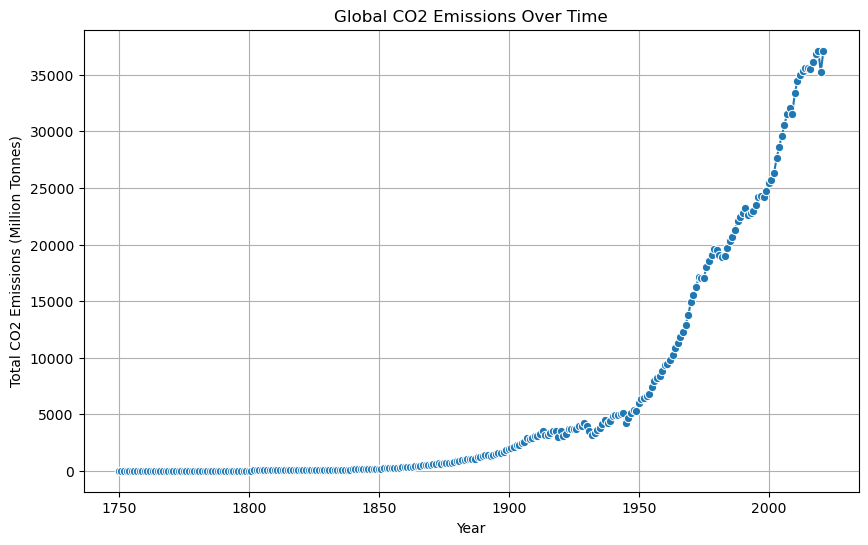

In [22]:
global_emissions = merged_df[merged_df['Country'] == 'Global']

yearly_global_emissions = global_emissions.groupby('Year')['Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Total', data=yearly_global_emissions, marker='o')
plt.title('Global CO2 Emissions Over Time')
plt.ylabel('Total CO2 Emissions (Million Tonnes)')
plt.xlabel('Year')
plt.grid()
plt.show()

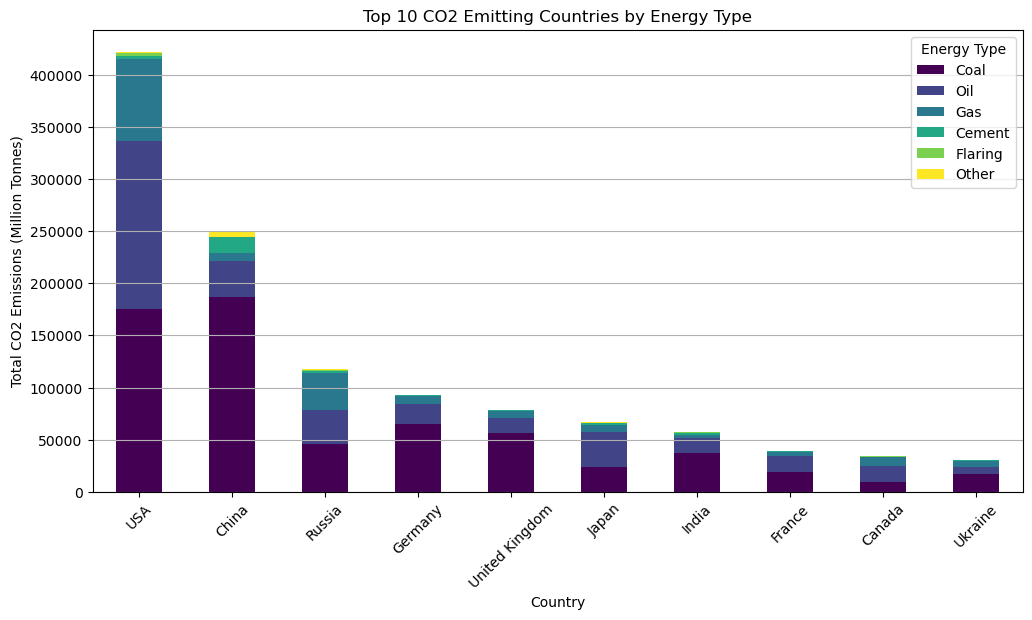

In [23]:
filtered_df = merged_df[(merged_df['Country'] != 'Global') & 
                         (merged_df['Country'] != 'International Transport')]

energy_types = ['Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Other']
country_energy_emissions = filtered_df.groupby('Country')[energy_types].sum().reset_index()

country_energy_emissions['Total'] = country_energy_emissions[energy_types].sum(axis=1)
top_10_countries_energy = country_energy_emissions.sort_values(by='Total', ascending=False).head(10)

top_10_countries_energy.set_index('Country', inplace=True)

top_10_countries_energy[energy_types].plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Top 10 CO2 Emitting Countries by Energy Type')
plt.xlabel('Country')
plt.ylabel('Total CO2 Emissions (Million Tonnes)')
plt.legend(title='Energy Type')
plt.grid(axis='y')
plt.show()

C:\Users\israv\AppData\Local\Temp\ipykernel_11888\642262880.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')


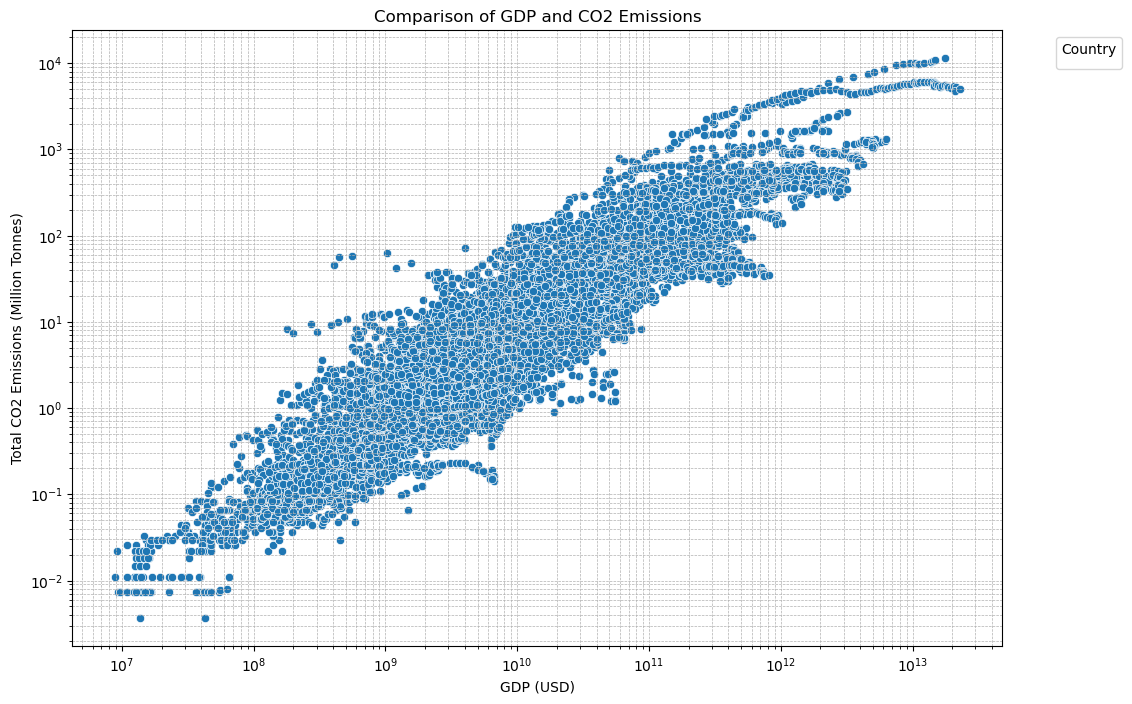

In [24]:
gdp_co2_df = merged_df[(merged_df['GDP_USD'].notna()) & 
                        (merged_df['Country'] != 'Global') & 
                        (merged_df['Country'] != 'International Transport')]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=gdp_co2_df, x='GDP_USD', y='Total', )

plt.title('Comparison of GDP and CO2 Emissions')
plt.xlabel('GDP (USD)')
plt.ylabel('Total CO2 Emissions (Million Tonnes)')
plt.xscale('log')  # Use log scale for better visualization of GDP
plt.yscale('log')  # Use log scale for better visualization of CO2 emissions
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

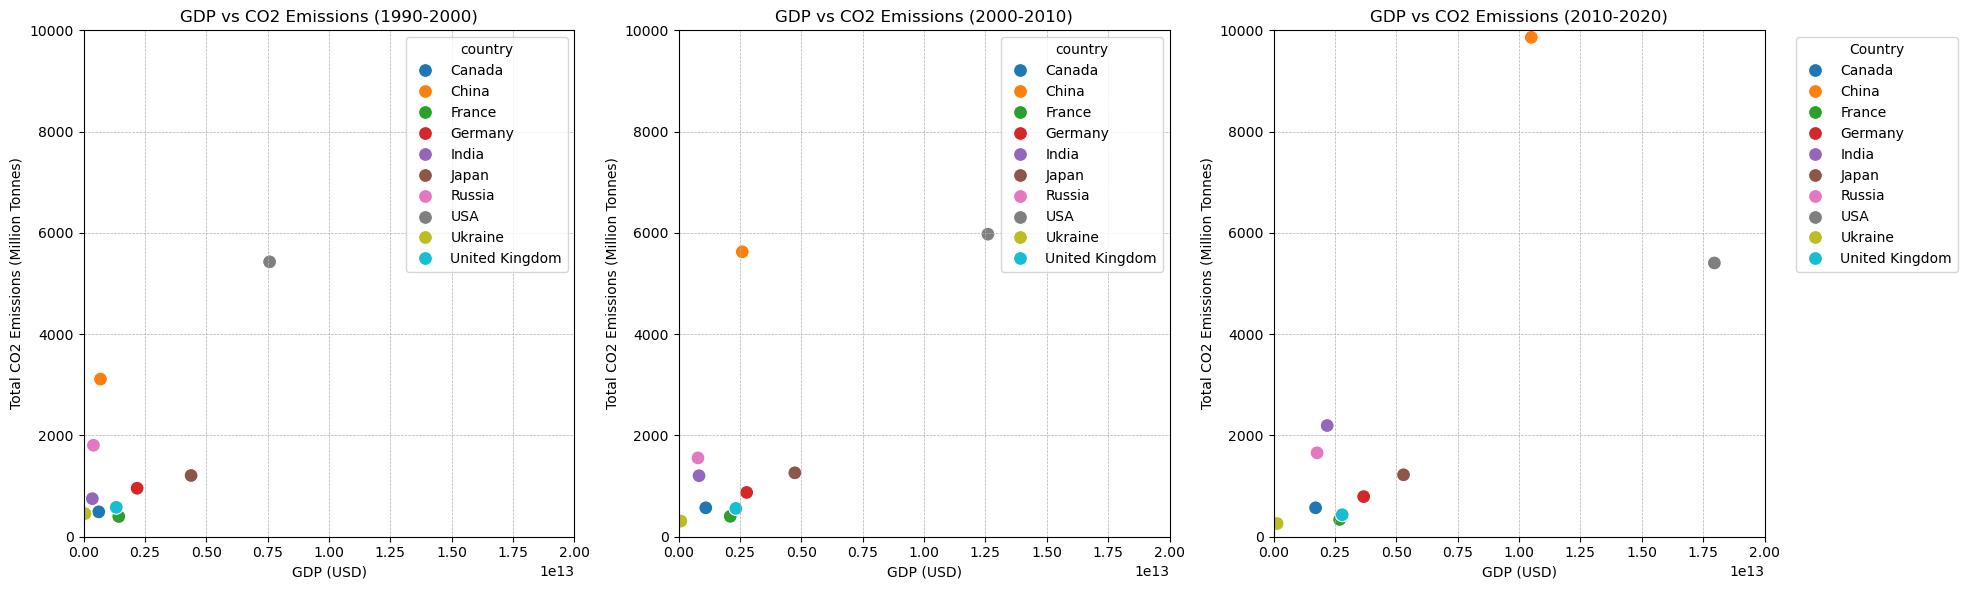

In [25]:
time_periods = [(1990, 2000), (2000, 2010), (2010, 2020)]

avg_data = []

for start_year, end_year in time_periods:

    period_df = merged_df[(merged_df['Year'] >= start_year) & (merged_df['Year'] < end_year)]
    
    top_10_countries = top_10_countries_energy.index.tolist()
    
    top_period_df = period_df[period_df['Country'].isin(top_10_countries)]
    
    avg_period = top_period_df.groupby('Country').agg({
        'GDP_USD': 'mean',
        'Total': 'mean'
    }).reset_index()
    
    avg_period.columns = ['country', 'gdp', 'co2']
    
    avg_period['start_year'] = start_year
    avg_period['end_year'] = end_year
    
    avg_data.append(avg_period)

# Export to a CSV file
final_avg_data = pd.concat(avg_data, ignore_index=True)
final_avg_data.to_csv('datasets/top_10_countries.csv', index=False)

plt.figure(figsize=(18, 6))

for i, (start_year, end_year) in enumerate(time_periods):
    data = avg_data[i]
    
    plt.subplot(1, 3, i + 1)
    
    sns.scatterplot(data=data, x='gdp', y='co2', s=100, hue='country', palette='tab10')
    
    plt.title(f'GDP vs CO2 Emissions ({start_year}-{end_year})')
    plt.xlabel('GDP (USD)')
    plt.ylabel('Total CO2 Emissions (Million Tonnes)')
    plt.xlim(0, 2 * 1e13)        
    plt.ylim(0, 10000)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')  # Position the legend outside
plt.show()
